In [1]:
import yfinance as yf
import pandas as pd

try:
    df = yf.download("AAPL", start="2010-01-01", end="2024-12-31", progress=False)
    if df.empty:
        raise ValueError("DataFrame is empty. Likely rate-limited or blocked.")
    print(df.head())
except Exception as e:
    print("Error occurred:", e)
    print("Loading local fallback data...")
    # Load from local CSV
    df = pd.read_csv('/mnt/data/aapl_close.csv', parse_dates=['Date'], index_col='Date')
    print(df.head())


YF.download() has changed argument auto_adjust default to True
Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455077  6.391278  6.422877  493729600
2010-01-05  6.451465  6.487878  6.417459  6.458085  601904800
2010-01-06  6.348846  6.477045  6.342226  6.451466  552160000
2010-01-07  6.337111  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379240  6.379842  6.291367  6.328682  447610800


In [2]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500


In [3]:
len(df)

3773

In [4]:
# Save to CSV
df.to_csv("apple.csv")


In [39]:
data=pd.read_csv("apple.csv")

In [40]:
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,6.440330982208252,6.455076781226995,6.391278499172716,6.422876697326148,493729600
3,2010-01-05,6.451464653015137,6.487877930287253,6.417458516486256,6.458085394989272,601904800
4,2010-01-06,6.348846435546875,6.477045280657176,6.342225692663006,6.451465539489639,552160000


In [41]:
data['Price'].rename('Date')

0           Ticker
1             Date
2       2010-01-04
3       2010-01-05
4       2010-01-06
           ...    
3770    2024-12-23
3771    2024-12-24
3772    2024-12-26
3773    2024-12-27
3774    2024-12-30
Name: Date, Length: 3775, dtype: object

In [42]:
data = data.iloc[2:].reset_index(drop=True)

In [54]:
data.head()

,Price,Close,High,Low,Open,Volume
0,2010-01-04,6.440330982208252,6.455076781226995,6.391278499172716,6.422876697326148,493729600
1,2010-01-05,6.451464653015137,6.487877930287253,6.417458516486256,6.458085394989272,601904800
2,2010-01-06,6.348846435546875,6.477045280657176,6.342225692663006,6.451465539489639,552160000
3,2010-01-07,6.33711051940918,6.379844011980407,6.291067458325215,6.372320439028967,477131200
4,2010-01-08,6.379239559173584,6.379841846598225,6.291367069476212,6.328682371478371,447610800


In [57]:
data.rename(columns={'Price': 'Date'}, inplace=True)

data.head()

,Date,Close,High,Low,Open,Volume
0,2010-01-04,6.440330982208252,6.455076781226995,6.391278499172716,6.422876697326148,493729600
1,2010-01-05,6.451464653015137,6.487877930287253,6.417458516486256,6.458085394989272,601904800
2,2010-01-06,6.348846435546875,6.477045280657176,6.342225692663006,6.451465539489639,552160000
3,2010-01-07,6.33711051940918,6.379844011980407,6.291067458325215,6.372320439028967,477131200
4,2010-01-08,6.379239559173584,6.379841846598225,6.291367069476212,6.328682371478371,447610800


In [58]:
data.to_csv("apple_1.csv")

In [71]:
import pandas as pd

# === 1. User-defined Date Range ===
start_date = input("Enter start date (YYYY-MM-DD): ")
end_date = input("Enter end date (YYYY-MM-DD): ")

# === 2. Load the CSV ===
df = pd.read_csv("apple_1.csv", parse_dates=['Date'])
df.set_index('Date', inplace=True)

# Filter data by user-provided date range
df = df.loc[start_date:end_date].copy()

# === 3. Calculate EMA50 and EMA200 ===
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()
df['Prev_EMA50'] = df['EMA50'].shift(1)
df['Prev_EMA200'] = df['EMA200'].shift(1)

# === 4. Detect Crossovers ===
df['Crossover'] = 0
df.loc[(df['EMA50'] > df['EMA200']) & (df['Prev_EMA50'] <= df['Prev_EMA200']), 'Crossover'] = 1  # Buy
df.loc[(df['EMA50'] < df['EMA200']) & (df['Prev_EMA50'] >= df['Prev_EMA200']), 'Crossover'] = -1 # Sell

# === 5. Simulate Trades ===
crossover_points = df[df['Crossover'] != 0][['Close', 'Crossover']]
trades = []
position = None
entry_price = None
entry_date = None

for date, row in crossover_points.iterrows():
    signal = row['Crossover']
    price = row['Close']

    if position is None:
        position = 'buy' if signal == 1 else 'sell'
        entry_price = price
        entry_date = date
    elif position == 'buy' and signal == -1:
        # Execute Buy-Sell Trade
        trades.append({
            'Buy Date': entry_date.date(),
            'Buy Price': round(entry_price, 2),
            'Sell Date': date.date(),
            'Sell Price': round(price, 2),
            'Profit/Loss': round(price - entry_price, 2)
        })
        position = 'sell'
    elif position == 'sell' and signal == 1:
        # Optional: Execute Sell-Buy (short trade) if needed
        position = 'buy'
        entry_price = price
        entry_date = date

# === 6. Create Trade Log and Summary ===
trades_df = pd.DataFrame(trades)
total_pl = trades_df['Profit/Loss'].sum()

# === 7. Output Results ===
print("\n📈 EMA 50/200 Crossover Trades:")
print(trades_df)
print(f"\n✅ Total Profit/Loss in range {start_date} to {end_date}: ${total_pl:.2f}")


Enter start date (YYYY-MM-DD):  2010-01-01
Enter end date (YYYY-MM-DD):  2024-12-31



📈 EMA 50/200 Crossover Trades:
     Buy Date  Buy Price   Sell Date  Sell Price  Profit/Loss
0  2010-01-05       6.45  2010-01-06        6.35        -0.10
1  2010-03-22       6.76  2012-12-20       15.84         9.08
2  2013-09-09      15.66  2015-09-04       24.62         8.95
3  2015-11-23      26.64  2015-12-16       25.19        -1.45
4  2016-08-23      25.05  2018-12-14       39.47        14.42
5  2019-04-08      47.93  2022-05-26      141.70        93.76
6  2022-08-11     166.28  2022-10-04      144.18       -22.10
7  2023-03-17     153.45  2024-03-27      172.50        19.04

✅ Total Profit/Loss in range 2010-01-01 to 2024-12-31: $121.60


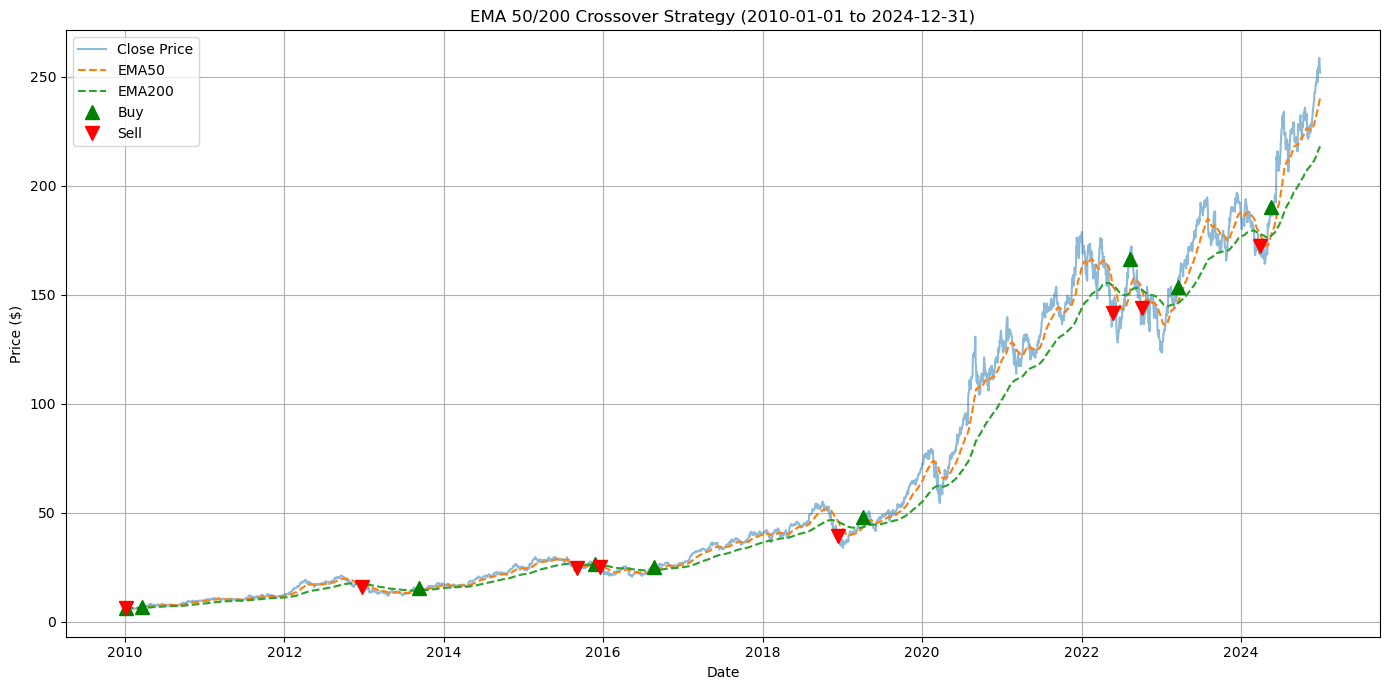

     Buy Date  Buy Price   Sell Date  Sell Price  Profit/Loss
0  2010-01-05       6.45  2010-01-06        6.35        -0.10
1  2010-03-22       6.76  2012-12-20       15.84         9.08
2  2013-09-09      15.66  2015-09-04       24.62         8.95
3  2015-11-23      26.64  2015-12-16       25.19        -1.45
4  2016-08-23      25.05  2018-12-14       39.47        14.42
5  2019-04-08      47.93  2022-05-26      141.70        93.76
6  2022-08-11     166.28  2022-10-04      144.18       -22.10
7  2023-03-17     153.45  2024-03-27      172.50        19.04

✅ Total Profit/Loss: $121.60


In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['EMA50'], label='EMA50', linestyle='--')
plt.plot(df['EMA200'], label='EMA200', linestyle='--')

# Plot buy signals
buy_signals = df[df['Crossover'] == 1]
sell_signals = df[df['Crossover'] == -1]

plt.plot(buy_signals.index, buy_signals['Close'], '^', color='green', markersize=10, label='Buy')
plt.plot(sell_signals.index, sell_signals['Close'], 'v', color='red', markersize=10, label='Sell')

plt.title(f'EMA 50/200 Crossover Strategy ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Output Results ===
print(trades_df)
print(f"\n✅ Total Profit/Loss: ${total_pl:.2f}")
